In [418]:
# from google.colab import drive
# drive.mount('/content/drive')

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [420]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [421]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# PRE PROCESSING

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [423]:
df.shape

(8523, 12)

In [424]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [425]:
print(df.Outlet_Size.mode()[0])
df.Outlet_Size.fillna(df.Outlet_Size.mode()[0],inplace=True)

Medium


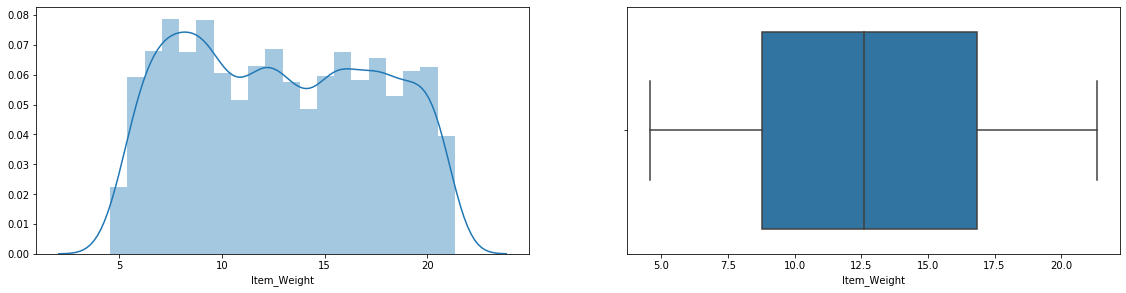

In [426]:
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 1)
sns.distplot(df["Item_Weight"])
plt.subplot(2, 3, 2)
sns.boxplot(df["Item_Weight"])

In [427]:
df.groupby('Outlet_Identifier')['Item_Weight'].mean()

Outlet_Identifier
OUT010    12.913153
OUT013    13.006148
OUT017    12.826668
OUT018    12.873346
OUT019          NaN
OUT027          NaN
OUT035    12.829349
OUT045    12.649989
OUT046    12.866801
OUT049    12.917446
Name: Item_Weight, dtype: float64

In [428]:
df.loc[(df.Outlet_Identifier=='OUT027') | (df.Outlet_Identifier=='OUT019') ,'Item_Weight']

7      NaN
18     NaN
21     NaN
23     NaN
29     NaN
        ..
8485   NaN
8487   NaN
8488   NaN
8490   NaN
8504   NaN
Name: Item_Weight, Length: 1463, dtype: float64

In [429]:
df.loc[(df.Outlet_Identifier=='OUT019'),'Outlet_Size']

23      Small
29      Small
49      Small
59      Small
63      Small
        ...  
8454    Small
8458    Small
8469    Small
8480    Small
8490    Small
Name: Outlet_Size, Length: 528, dtype: object

In [430]:
df.loc[(df.Outlet_Identifier=='OUT027'),'Outlet_Size']

7       Medium
18      Medium
21      Medium
36      Medium
38      Medium
         ...  
8472    Medium
8485    Medium
8487    Medium
8488    Medium
8504    Medium
Name: Outlet_Size, Length: 935, dtype: object

In [431]:
df.groupby('Outlet_Size')['Item_Weight'].mean()

Outlet_Size
High      13.006148
Medium    12.829387
Small     12.848075
Name: Item_Weight, dtype: float64

In [432]:
df.loc[df.Outlet_Identifier=='OUT027','Item_Weight']=12.829387
df.loc[df.Outlet_Identifier=='OUT019','Item_Weight']=12.848075

In [433]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [434]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [435]:
df.drop_duplicates(inplace=True)
df.shape

(8523, 12)

In [436]:
test.loc[test.Outlet_Identifier=='OUT027','Item_Weight']=12.829387
test.loc[test.Outlet_Identifier=='OUT019','Item_Weight']=12.848075
test.Outlet_Size.fillna(df.Outlet_Size.mode()[0],inplace=True)
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [437]:
df.nunique()

Item_Identifier              1559
Item_Weight                   417
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# EDA

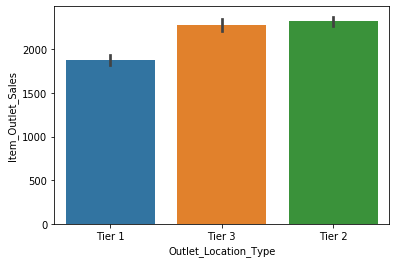

In [438]:
sns.barplot(x=df.Outlet_Location_Type,y=df.Item_Outlet_Sales)

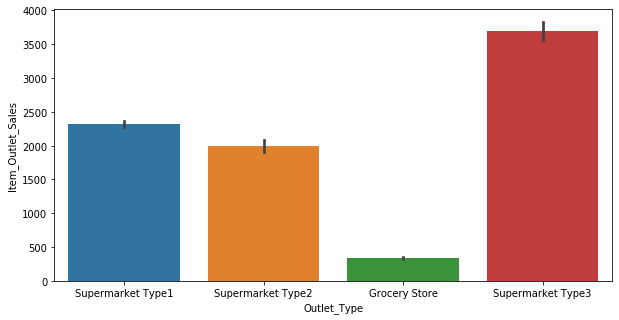

In [439]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.Outlet_Type,y=df.Item_Outlet_Sales)

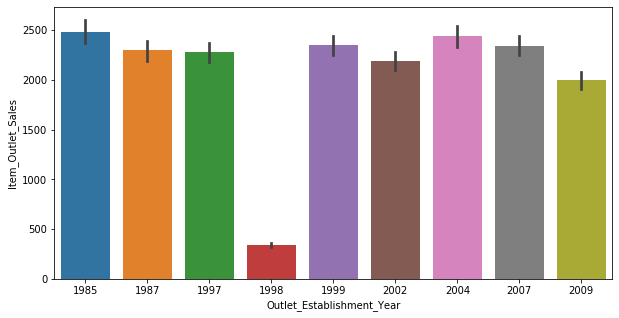

In [440]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.Outlet_Establishment_Year,y=df.Item_Outlet_Sales)

In [441]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().rank()

Outlet_Establishment_Year
1985    9.0
1987    5.0
1997    4.0
1998    1.0
1999    7.0
2002    3.0
2004    8.0
2007    6.0
2009    2.0
Name: Item_Outlet_Sales, dtype: float64

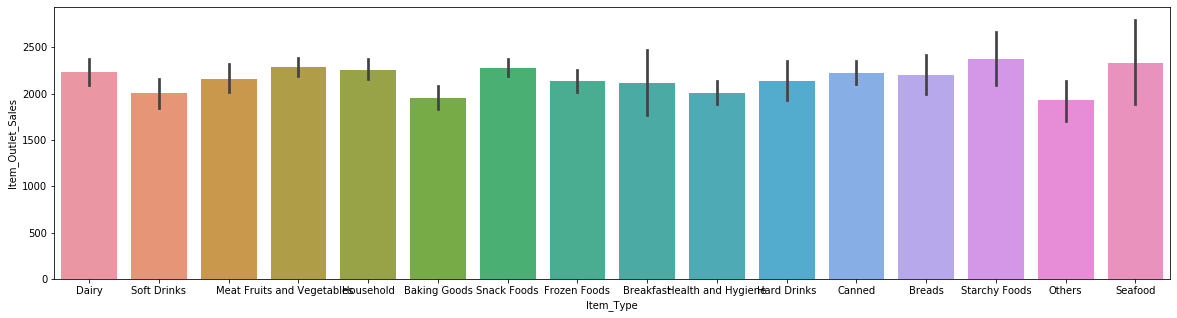

In [442]:
plt.figure(figsize=(20,5))
sns.barplot(x=df.Item_Type,y=df.Item_Outlet_Sales)

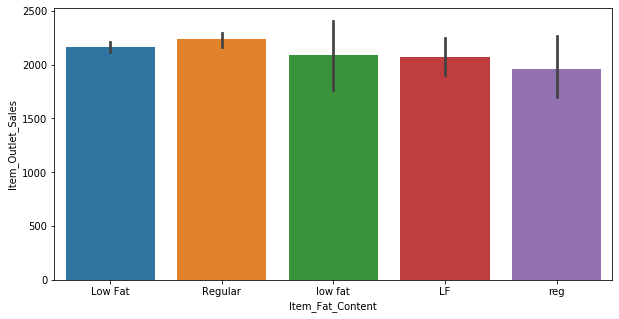

In [443]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.Item_Fat_Content,y=df.Item_Outlet_Sales)

In [444]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [445]:
df['Item_Fat_Content'].replace("low fat","Low Fat",inplace=True)
df['Item_Fat_Content'].replace("LF","Low Fat",inplace=True)
df['Item_Fat_Content'].replace("reg","Regular",inplace=True)

test['Item_Fat_Content'].replace("low fat","Low Fat",inplace=True)
test['Item_Fat_Content'].replace("LF","Low Fat",inplace=True)
test['Item_Fat_Content'].replace("reg","Regular",inplace=True)

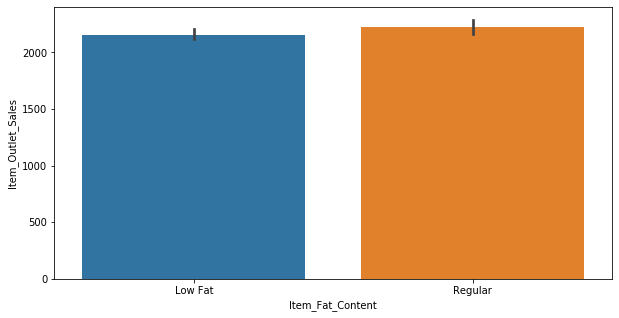

In [446]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.Item_Fat_Content,y=df.Item_Outlet_Sales)

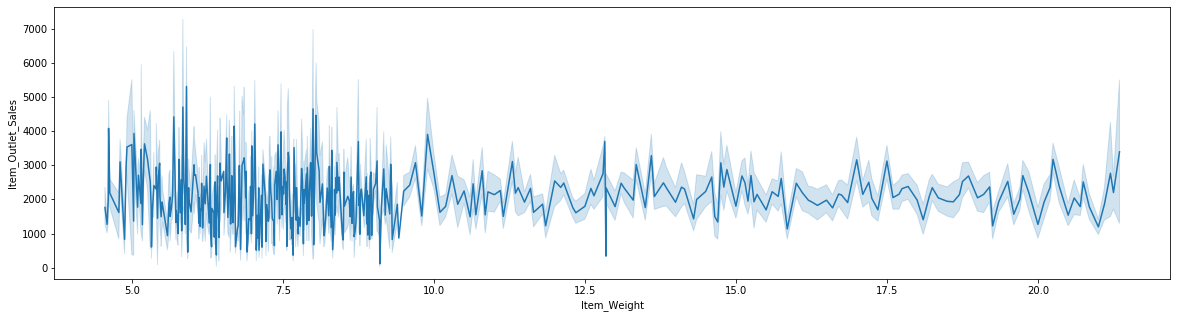

In [447]:
plt.figure(figsize=(20,5))
sns.lineplot(x=df.Item_Weight,y=df.Item_Outlet_Sales)

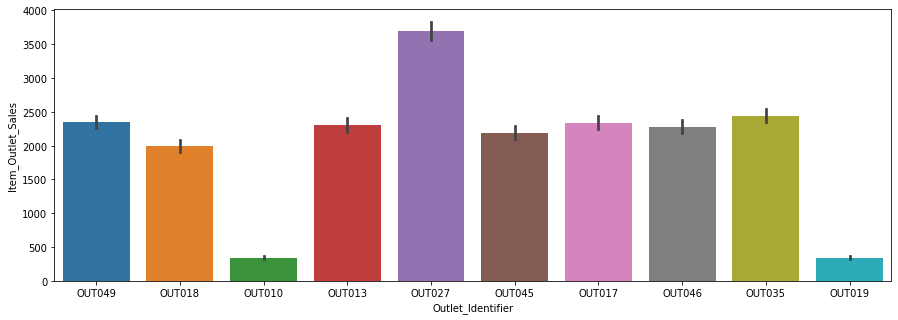

In [448]:
plt.figure(figsize=(15,5))
sns.barplot(x=df.Outlet_Identifier,y=df.Item_Outlet_Sales)

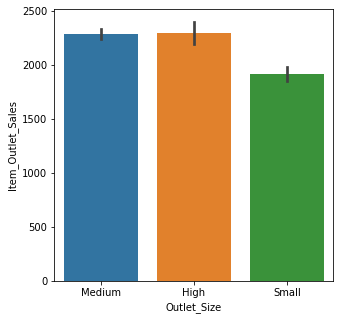

In [449]:
plt.figure(figsize=(5,5))
sns.barplot(x=df.Outlet_Size,y=df.Item_Outlet_Sales)

In [450]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

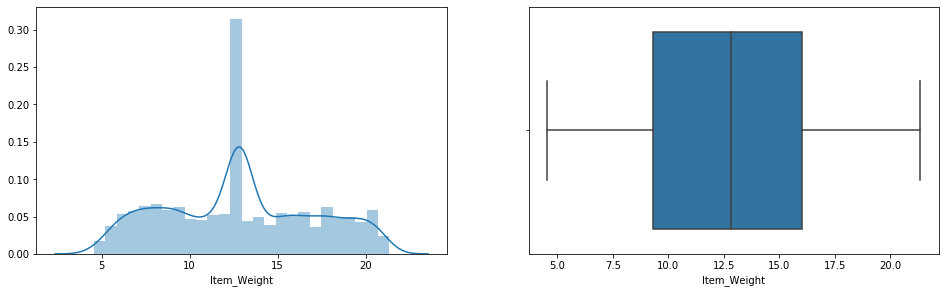

In [451]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.distplot(df["Item_Weight"])
plt.subplot(2, 3, 2)
sns.boxplot(df["Item_Weight"])

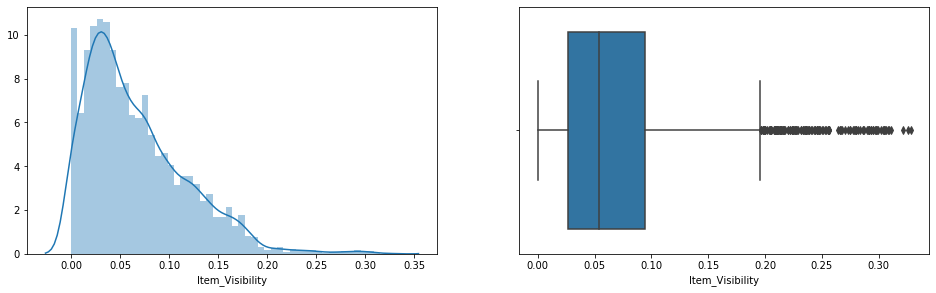

In [452]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.distplot(df["Item_Visibility"])
plt.subplot(2, 3, 2)
sns.boxplot(df["Item_Visibility"])

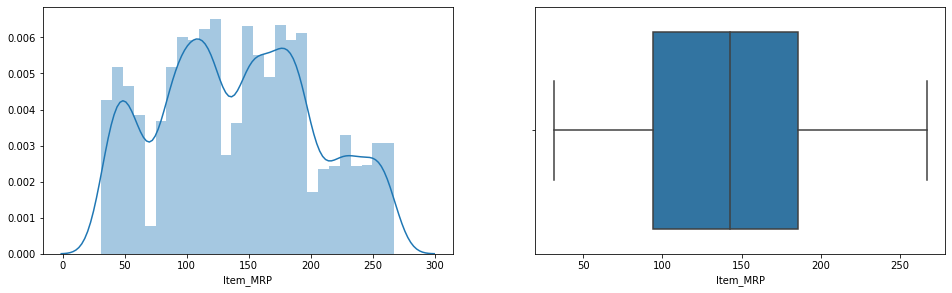

In [453]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.distplot(df["Item_MRP"])
plt.subplot(2, 3, 2)
sns.boxplot(df["Item_MRP"])

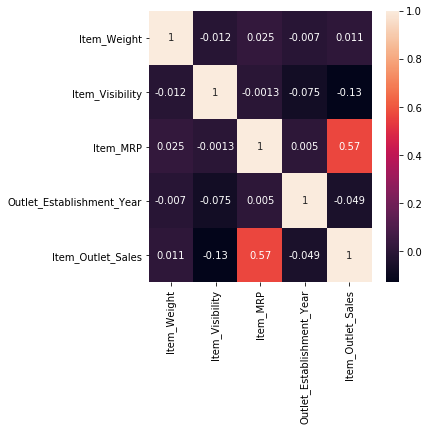

In [454]:
plt.figure(figsize=(5,5))
sns.heatmap(data=df.corr(),annot=True)

In [455]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# TRAIN-VALIDATION SPLIT

In [456]:
from sklearn.model_selection import train_test_split
train, localtest = train_test_split(
    df,
    test_size=0.3,
    random_state=0,
      )

train.shape, localtest.shape

((5966, 12), (2557, 12))

# FEATURE ENGINEERING

In [457]:
import datetime
Today = datetime.datetime.now()

train['Outlet_Age'] = Today.year - train['Outlet_Establishment_Year']
localtest['Outlet_Age'] = Today.year - localtest['Outlet_Establishment_Year']
test['Outlet_Age'] = Today.year - test['Outlet_Establishment_Year']

train.drop('Outlet_Establishment_Year',axis=1,inplace=True)
localtest.drop('Outlet_Establishment_Year',axis=1,inplace=True)
test.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [458]:
lookup=train.groupby(['Item_Type','Item_Fat_Content'])['Item_Outlet_Sales'].agg(['mean']).reset_index()
lookup=lookup.rename(columns={'mean':'Item_Fat_Mean'})
lookup

,Item_Type,Item_Fat_Content,Item_Fat_Mean
0,Baking Goods,Low Fat,1814.281741
1,Baking Goods,Regular,2153.809468
2,Breads,Low Fat,2116.872554
3,Breads,Regular,2275.215585
4,Breakfast,Low Fat,2373.621387
5,Breakfast,Regular,1902.658077
6,Canned,Low Fat,2200.471707
7,Canned,Regular,2295.902324
8,Dairy,Low Fat,2124.102206
9,Dairy,Regular,2255.719719


In [459]:
train=pd.merge(train,lookup,how='left',left_on=['Item_Type','Item_Fat_Content'],right_on=['Item_Type','Item_Fat_Content'])
localtest=pd.merge(localtest,lookup,how='left',left_on=['Item_Type','Item_Fat_Content'],right_on=['Item_Type','Item_Fat_Content'])
test=pd.merge(test,lookup,how='left',left_on=['Item_Type','Item_Fat_Content'],right_on=['Item_Type','Item_Fat_Content'])

In [460]:
item_type_dict=train.groupby('Item_Type')['Item_Outlet_Sales'].mean().to_dict()
train['Item_Type']=train['Item_Type'].map(item_type_dict)
localtest['Item_Type']=localtest['Item_Type'].map(item_type_dict)
test['Item_Type']=test['Item_Type'].map(item_type_dict)

In [461]:
outlet_sales_mean_dict=train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().to_dict()
train['Outlet_Saleswise_Mean']=train['Outlet_Identifier'].map(outlet_sales_mean_dict)
localtest['Outlet_Saleswise_Mean']=localtest['Outlet_Identifier'].map(outlet_sales_mean_dict)
test['Outlet_Saleswise_Mean']=test['Outlet_Identifier'].map(outlet_sales_mean_dict)

In [462]:
lookup2=train.groupby(['Outlet_Size','Outlet_Type'])['Item_Outlet_Sales'].agg(['mean']).reset_index()
lookup2=lookup2.rename(columns={'mean':'Outlet_Size_Type_Mean'})
lookup2

,Outlet_Size,Outlet_Type,Outlet_Size_Type_Mean
0,High,Supermarket Type1,2276.064998
1,Medium,Grocery Store,335.423847
2,Medium,Supermarket Type1,2303.494714
3,Medium,Supermarket Type2,1972.748251
4,Medium,Supermarket Type3,3663.008639
5,Small,Grocery Store,344.448863
6,Small,Supermarket Type1,2330.678284


In [463]:
train=pd.merge(train,lookup2,how='left',left_on=['Outlet_Size','Outlet_Type'],right_on=['Outlet_Size','Outlet_Type'])
localtest=pd.merge(localtest,lookup2,how='left',left_on=['Outlet_Size','Outlet_Type'],right_on=['Outlet_Size','Outlet_Type'])
test=pd.merge(test,lookup2,how='left',left_on=['Outlet_Size','Outlet_Type'],right_on=['Outlet_Size','Outlet_Type'])

In [464]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Fat_Mean,Outlet_Saleswise_Mean,Outlet_Size_Type_Mean
0,FDN33,6.305000,Regular,0.123116,2262.239666,95.6436,OUT046,Small,Tier 1,Supermarket Type1,661.8052,23,2088.458613,2261.483146,2330.678284
1,FDY31,5.980000,Low Fat,0.043809,2203.242015,146.8418,OUT017,Medium,Tier 2,Supermarket Type1,1765.7016,13,2108.682155,2332.127409,2303.494714
2,NCH54,12.829387,Low Fat,0.072317,2263.643850,160.7920,OUT027,Medium,Tier 3,Supermarket Type3,3675.2160,35,2263.643850,3663.008639,3663.008639
3,FDY15,12.848075,Regular,0.299098,2176.137036,157.8630,OUT019,Small,Tier 1,Grocery Store,469.3890,35,2255.719719,344.448863,344.448863
4,NCT30,9.100000,Low Fat,0.080278,2263.643850,47.2718,OUT035,Small,Tier 2,Supermarket Type1,850.8924,16,2263.643850,2405.923872,2330.678284


In [465]:
categorical_columns = list(train.columns[train.dtypes == 'object'])
usefull = ['Item_Identifier','Outlet_Identifier']
for i in usefull:
    categorical_columns.remove(i)
    
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 

for column in categorical_columns:
    train[column]= label_encoder.fit_transform(train[column])
    localtest[column]= label_encoder.transform(localtest[column])
    test[column]= label_encoder.transform(test[column])

In [466]:
label=["1","2","3","4"]
train["MRP_Bin"],bining=pd.qcut(train["Item_MRP"], 4,retbins=True,labels=label)
localtest["MRP_Bin"]=pd.cut(localtest["Item_MRP"],bins=bining,labels=label)
test["MRP_Bin"]=pd.cut(test["Item_MRP"],bins=bining,labels=label)
print(bining)
train["MRP_Bin"]=train["MRP_Bin"].astype(int)
#localtest["MRP_Bin"]=localtest["MRP_Bin"].astype(int)
test["MRP_Bin"]=test["MRP_Bin"].astype(int)

[ 31.89     93.1804  142.0654  185.19175 266.8884 ]


In [467]:
print(train.Item_MRP.min(),train.Item_MRP.max())
print(localtest.Item_MRP.min(),localtest.Item_MRP.max())
print(test.Item_MRP.min(),test.Item_MRP.max())

31.89 266.8884
31.29 266.5884
31.99 266.5884


In [468]:
localtest.MRP_Bin.fillna("1",inplace=True)
localtest["MRP_Bin"]=localtest["MRP_Bin"].astype(int)

In [469]:
train.drop('Item_Identifier',axis=1,inplace=True)
localtest.drop('Item_Identifier',axis=1,inplace=True)

train.drop('Outlet_Identifier',axis=1,inplace=True)
localtest.drop('Outlet_Identifier',axis=1,inplace=True)

In [470]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Outlet_Age', 'Item_Fat_Mean',
       'Outlet_Saleswise_Mean', 'Outlet_Size_Type_Mean', 'MRP_Bin'],
      dtype='object')

# SPLITTING IN X & y

In [471]:
X_train= train.drop("Item_Outlet_Sales",axis=1)
y_train= train["Item_Outlet_Sales"]

X_localtest= localtest.drop("Item_Outlet_Sales",axis=1)
y_localtest= localtest["Item_Outlet_Sales"]

X_train.shape, X_localtest.shape, y_train.shape, y_localtest.shape

((5966, 13), (2557, 13), (5966,), (2557,))

# FEATURE SELECTION

In [472]:
from sklearn.feature_selection import VarianceThreshold
varModel=VarianceThreshold(threshold=0) #Setting variance threshold to 0 which means features that have same value in all samples.
varModel.fit(X_train)
constArr=varModel.get_support()
constCol=[col for col in X_train.columns if col not in X_train.columns[constArr]]
constCol

[]

In [473]:
#Create variance threshold model
quasiModel=VarianceThreshold(threshold=0.01) #It will search for the features having 99% of same value in all samples.
quasiModel.fit(X_train)
quasiArr=quasiModel.get_support()
#Print out quasi constant feature name
quasiCols=[col for col in X_train.columns if col not in X_train.columns[quasiArr]]
quasiCols

['Item_Visibility']

In [474]:
X_train = X_train.drop(['Item_Visibility'], axis =1)
X_localtest = X_localtest.drop(['Item_Visibility'], axis =1)

test = test.drop(['Item_Visibility'], axis =1)

In [475]:
def get_corr(data, threshold):
    corr_cols=set()  #set is to store only the unique entries
    cormat=data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i,j])>threshold:
                col_name=cormat.columns[i]
                corr_cols.add(col_name)
    return corr_cols

corr_features=get_corr(X_train,0.80)
corr_features

{'MRP_Bin', 'Outlet_Saleswise_Mean', 'Outlet_Size_Type_Mean'}

In [476]:
# X_train = X_train.drop(['MRP_Bin','Outlet_Saleswise_Mean','Outlet_Size_Type_Mean'], axis =1)
# X_localtest = X_localtest.drop(['MRP_Bin','Outlet_Saleswise_Mean','Outlet_Size_Type_Mean'], axis =1)
# test = test.drop(['MRP_Bin','Outlet_Saleswise_Mean','Outlet_Size_Type_Mean'], axis =1)

In [477]:
X_train.shape

(5966, 12)

In [478]:
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs= SFS(RandomForestRegressor(n_jobs=-1,random_state=0),
         k_features= (1,9),
         forward=True,
         floating=False,
         verbose=2,
         scoring='r2',
         cv= 3
        ).fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   21.9s finished

[2020-09-15 15:30:55] Features: 1/9 -- score: 0.29834019141759227[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   10.7s finished

[2020-09-15 15:31:06] Features: 2/9 -- score: 0.5740052148660978[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.5s finished

[2020-09-15 15:31:16] Features: 3/9 -- score: 0.5733023582055546[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [479]:
imp_feat_sfs=list(sfs.k_feature_names_)
print(len(imp_feat_sfs))
imp_feat_sfs

2


['Outlet_Type', 'MRP_Bin']

In [480]:
sfs.k_score_

0.5740052148660978

In [481]:
X_final_train=pd.DataFrame(X_train,columns=imp_feat_sfs)
y_final_train=y_train
X_final_localtest=pd.DataFrame(X_localtest,columns=imp_feat_sfs)
y_final_localtest=y_localtest

# RANDOM FOREST REGRESSOR

In [397]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=1)
rfr.fit(X_final_train,y_final_train)

RandomForestRegressor(random_state=1)

In [398]:
y_pred_rfr=rfr.predict(X_final_localtest)

In [399]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_final_localtest, y_pred_rfr)
rmse = np.sqrt(mse)
r2=r2_score(y_final_localtest, y_pred_rfr)
print(rmse,r2)

1181.1003650454638 0.5418849294715148


# XGBREGRESSOR

In [400]:
from xgboost import XGBRegressor

In [401]:
xgb = XGBRegressor(random_state=0)
xgb.fit(X_final_train,y_final_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [402]:
y_pred_xgb=xgb.predict(X_final_localtest)

In [403]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_final_localtest, y_pred_xgb)
rmse = np.sqrt(mse)
r2=r2_score(y_final_localtest, y_pred_xgb)
print(rmse,r2)

1189.976444090503 0.5349735019917725


# LightGBM

In [404]:
import lightgbm
from lightgbm import LGBMRegressor

In [405]:
lgb=LGBMRegressor(random_state=1)
lgb.fit(X_final_train,y_final_train)

LGBMRegressor(random_state=1)

In [406]:
y_pred_lgbm = lgb.predict(X_final_localtest)

In [407]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_final_localtest, y_pred_lgbm)
rmse = np.sqrt(mse)
r2=r2_score(y_final_localtest, y_pred_lgbm)
print(rmse,r2)

1134.2565124714272 0.5775030925032574


# Hyperparameter Tuning for LGBMRegressor

In [411]:
params={
 "learning_rate"    : [0.02,0.05, 0.10] ,
 "boosting_type"    : ['gbdt','dart'],
 "num_leaves"       : [10,15,20,25],
 "max_depth"        : [-1, 1, 2, 3, 4],
 "n_estimators"     : [100,200,300,400]
}

In [412]:
regressor=LGBMRegressor(random_state=0)
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(regressor,param_grid=params,scoring='r2',n_jobs=-1,cv=4,verbose=2)

In [413]:
grid_search.fit(X_final_train,y_final_train)

Fitting 4 folds for each of 480 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 12.1min finished


GridSearchCV(cv=4, estimator=LGBMRegressor(random_state=0), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.02, 0.05, 0.1],
                         'max_depth': [-1, 1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400],
                         'num_leaves': [10, 15, 20, 25]},
             scoring='r2', verbose=2)

In [414]:
grid_search.best_estimator_

LGBMRegressor(learning_rate=0.05, max_depth=4, num_leaves=20, random_state=0)

In [416]:
lgb_tuned=grid_search.best_estimator_

In [417]:
lgb_tuned.fit(X_final_train,y_final_train)
y_pred_lgbm_tuned = lgb_tuned.predict(X_final_localtest)
mse = mean_squared_error(y_localtest, y_pred_lgbm_tuned)
rmse = np.sqrt(mse)
r2=r2_score(y_final_localtest, y_pred_lgbm_tuned)
print(rmse,r2)

1104.4904258455579 0.599387143476191


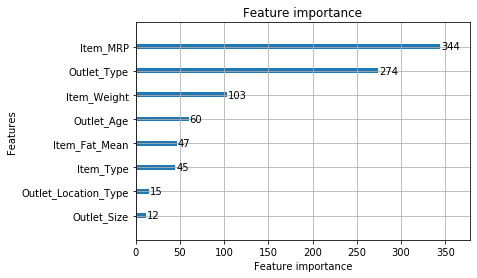

In [177]:
lightgbm.plot_importance(lgb_tuned)

# Final Prediction

In [178]:
frames=[X_final_train,X_final_localtest]
X_complete_train=pd.concat(frames)
print(X_complete_train.shape)
y_complete_train=y_train.append(y_final_localtest)
len(y_complete_train)

(8523, 9)


8523

In [179]:
X_final_test=test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [180]:
X_complete_train.shape, X_final_test.shape

((8523, 9), (5681, 9))

In [181]:
lgb_tuned.fit(X_complete_train,y_complete_train)

LGBMRegressor(learning_rate=0.05, max_depth=4, num_leaves=10, random_state=0)

In [182]:
 y_final_test=lgb_tuned.predict(X_final_test)

In [183]:
submission=pd.DataFrame({'Item_Identifier': test["Item_Identifier"],'Outlet_Identifier':test["Outlet_Identifier"],'Item_Outlet_Sales':y_final_test})
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1676.561345
1,FDW14,OUT017,1368.374248
2,NCN55,OUT010,630.260944
3,FDQ58,OUT017,2519.730705
4,FDY38,OUT027,6201.366593
...,...,...,...
5676,FDB58,OUT046,2191.894011
5677,FDD47,OUT018,2536.215081
5678,NCO17,OUT045,1855.923153
5679,FDJ26,OUT017,3617.464323


In [184]:
submission.loc[submission.Item_Outlet_Sales<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales


In [185]:
submission.to_csv('lgb tuned.csv',index=False)